# Segmentation model - Skin

### Load and mapping for 300 images

For computational restrictions, we will only use 300 images. Later on, using google collab, we will train the model with more data.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.io.parsers import read_csv
from skimage.color import rgb2gray

In [2]:
i=1
#path_mask = "/content/drive/My Drive/zMaster/Dades Agil/Agile DS Project/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/'+str(i).zfill(5)+'_hair.jpg"
path_mask = '/zMaster/Dades Agil/Agile DS Project/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/'+str(i).zfill(5)+'_hair.jpg'

In [3]:
mask = cv2.imread(path_mask)
print(mask) 

None


In [4]:
#Load masks
indx = []
y = []
for i in range(300):
    path_mask = '../CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/'+str(i).zfill(5)+'_skin.png'
    mask = cv2.imread(path_mask)
    #mask = cv2.resize(mask, (256, 256))
    if mask is None:
        continue
    indx.append(i)
    mask = rgb2gray(mask)
    #mask = mask.flatten()
    y.append(mask)

In [5]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

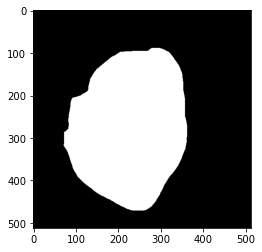

In [6]:
#maskEx = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
#maskEx = cv2.resize(maskEx, (96,96))
plt.figure(figsize=(4,4))
plt.imshow(mask,cmap="gray")
plt.show()


In [7]:
mask.shape

(512, 512)

In [8]:
#Load Images
X = []
for i in range(len(indx)):
    path_image = '../CelebAMask-HQ/CelebA-HQ-img/'+str(indx[i])+'.jpg'
    img = cv2.imread(path_image)
    #img = rgb2gray(img)
    img = cv2.resize(img, (512,512))
    #img = img.flatten()
    X.append(img)

In [9]:
img.shape

(512, 512, 3)

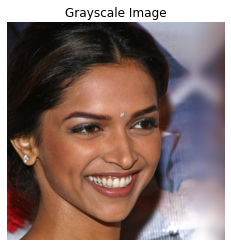

(512, 512, 3)

In [10]:
imgEx = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#imgEx = cv2.resize(imgEx, (96,96))

plt.figure(figsize=(4,4))
plt.imshow(imgEx)
plt.axis('off')
plt.title("Grayscale Image")
plt.show()
imgEx.shape

In [11]:
print(np.array(X).shape)
print(np.array(y).shape)
X = np.array(X)
y = np.array(y)

(300, 512, 512, 3)
(300, 512, 512)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#X_train = np.expand_dims(X_train, -1)

In [13]:
X_train.shape

(210, 512, 512, 3)

In [14]:
X.shape

(300, 512, 512, 3)

In [15]:
y.shape

(300, 512, 512)

## Final model architecture + parameters

After trying different architectures, we are using U-Net. Some references taken: https://keras.io/examples/vision/oxford_pets_image_segmentation/

In [16]:
pip install tensorflow

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Enric\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [16]:
import tensorflow as tf

In [17]:
def unet(input_size = (512,512,3)):
    inputs = tf.keras.layers.Input(input_size)
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

In [124]:
model=unet(input_size=(512,512,3))

In [19]:
from tensorflow.keras.optimizers import Adam 
#from keras.callbacks import EarlyStopping

In [125]:
optimizer_adam = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [126]:
#EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
#Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
#model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
#tensorbord=TensorBoard(log_dir='logs')
#callback=[EarlyStop , Reduce_LR,model_check,tensorbord]

In [127]:
model.compile(optimizer=optimizer_adam,loss='binary_crossentropy',metrics=['accuracy'])

In [132]:
model.load_weights(checkpoint_path)

## Training model

In [27]:
history=model.fit(X_train, y_train, epochs=7,batch_size=2, verbose=1)

Epoch 1/7
105/105 [==============================] - 225s 2s/step - loss: 0.1198 - accuracy: 0.9573
Epoch 2/7
105/105 [==============================] - 231s 2s/step - loss: 0.1107 - accuracy: 0.9596
Epoch 3/7
105/105 [==============================] - 229s 2s/step - loss: 0.1029 - accuracy: 0.9627
Epoch 4/7
105/105 [==============================] - 230s 2s/step - loss: 0.1013 - accuracy: 0.9645
Epoch 5/7
105/105 [==============================] - 230s 2s/step - loss: 0.0877 - accuracy: 0.9684
Epoch 6/7
105/105 [==============================] - 230s 2s/step - loss: 0.0775 - accuracy: 0.9718
Epoch 7/7
105/105 [==============================] - 234s 2s/step - loss: 0.0809 - accuracy: 0.9715


In [130]:
import os

In [131]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

### Predictions into test set

In [133]:
y_pred=model.predict(X_test)

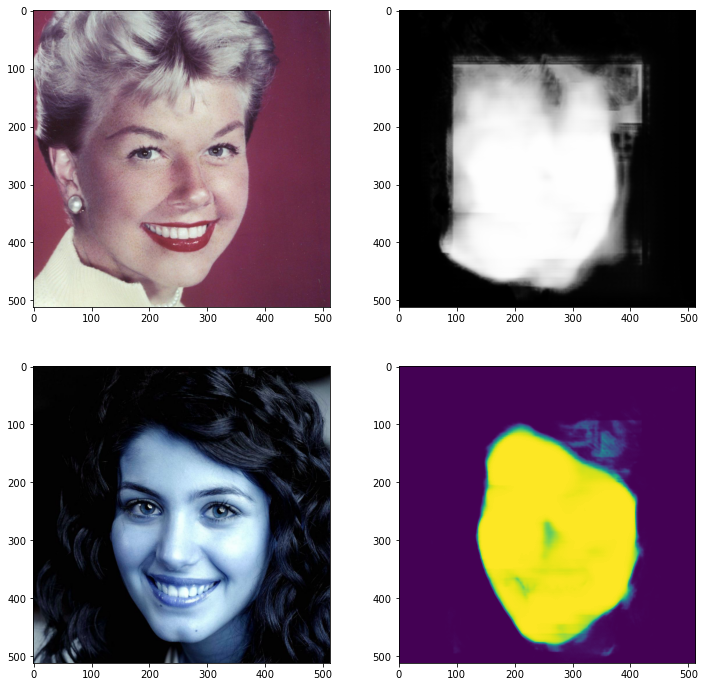

In [134]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))
X_testProva = cv2.cvtColor(X_test[5],cv2.COLOR_BGR2RGB)
y_predProva = cv2.cvtColor(y_pred[5], cv2.COLOR_BGR2RGB)
axs[0,0].imshow(X_testProva)
axs[0,1].imshow(y_predProva)
axs[1,0].imshow(X_test[4])
axs[1,1].imshow(y_pred[4])

In [135]:
path_mask = '../CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/TestImage.png'
mask = cv2.imread(path_mask)

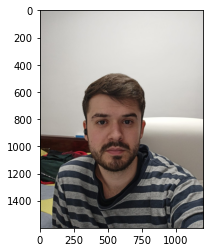

In [136]:
plt.show()
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))

In [137]:
mask.shape

(1600, 1200, 3)

In [138]:
ImgScaled = cv2.resize(mask, (512, 512))

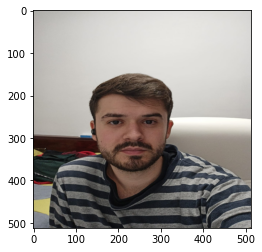

In [139]:
plt.show()
plt.imshow(cv2.cvtColor(ImgScaled,cv2.COLOR_BGR2RGB))

In [140]:
X_train.shape

(210, 512, 512, 3)

In [141]:
T = []
for i in range(2):
    img = cv2.imread(path_image)
    #img = rgb2gray(img)
    img = cv2.resize(img, (512,512))
    #img = img.flatten()
    T.append(ImgScaled)

In [142]:
T = np.array(T)

In [143]:
T.shape

(2, 512, 512, 3)

In [146]:
y_pred2 = model.predict(T)

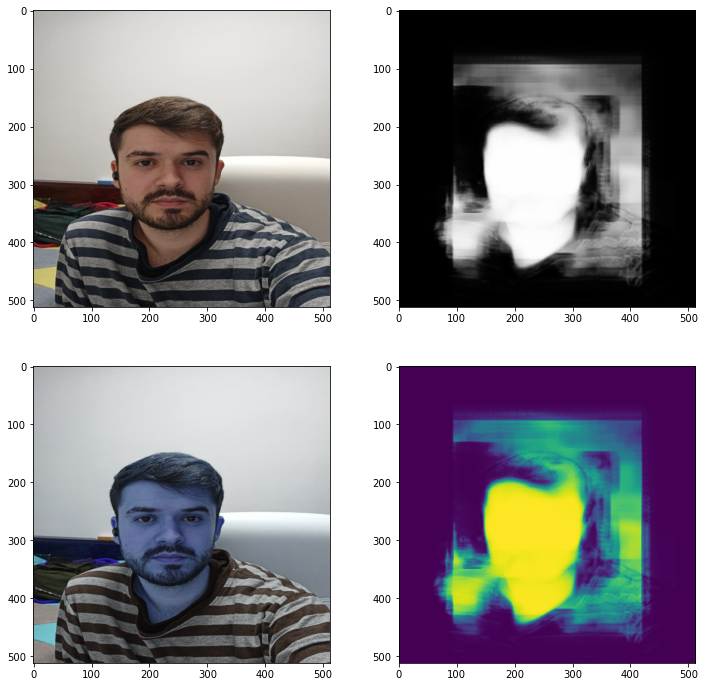

In [147]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))
X_testProva = cv2.cvtColor(T[0],cv2.COLOR_BGR2RGB)
y_predProva = cv2.cvtColor(y_pred2[0], cv2.COLOR_BGR2RGB)
axs[0,0].imshow(X_testProva)
axs[0,1].imshow(y_predProva)
axs[1,0].imshow(T[0])
axs[1,1].imshow(y_pred2[0])

### Need to improve! Low computational power to train model